In [151]:
import umap as umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("white")
%matplotlib inline

In [149]:
def pDose(x):
    '''This is just a helper function, to compute easily log transformed concentrations used in drug discovery'''
    return(-np.log10(1e-6*x))

In [5]:
BaseDir = "./results/"

In [10]:
# Import feature data after QC
selected_df = pd.read_csv("{}colopaint44_selected_data.csv".format(BaseDir), sep=";", index_col=0)
ListOfMetadata = list(selected_df.columns[selected_df.columns.str.contains("Metadata_")])
selected_df.head(1)

,Metadata_layout_id,Metadata_well_id,Metadata_batch_id,Metadata_solvent,Metadata_stock_conc,Metadata_stock_conc_unit,Metadata_cmpd_vol,Metadata_cmpd_vol_unit,Metadata_well_vol,Metadata_well_vol_unit,...,RadialDistribution_ZernikePhase_illumPHAandWGA_4_4_cytoplasm,Granularity_9_illumMITO_nuclei_MAD,Correlation_Manders_illumHOECHST_illumCONC_nuclei,RadialDistribution_ZernikePhase_illumCONC_9_5_cells_MAD,RadialDistribution_ZernikePhase_illumPHAandWGA_6_6_nuclei,Correlation_RWC_illumHOECHST_illumPHAandWGA_nuclei,RadialDistribution_ZernikePhase_illumMITO_3_1_cells_MAD,Correlation_K_illumSYTO_illumHOECHST_cells_MAD,RadialDistribution_MeanFrac_illumSYTO_2of4_nuclei,AreaShape_Zernike_7_1_cytoplasm_MAD
0,colo44-v1-FA-P017365-CACO2-48h-P1-L1,B02,PHB000015,dmso,10.0,mM,7.5,nL,30,uL,...,0.775039,-0.701098,0.0,-0.032029,-1.39248,2.578443,-1.493628,-0.679904,2.999423,0.48192


In [252]:


df_toplot = selected_df
#df_toplot = selected_df[selected_df['Metadata_cmpd_conc'] != 0.00833]
#df_toplot = df_toplot[df_toplot['Metadata_pert_type'] != 'poscon']
#df_toplot = df_toplot[df_toplot['Metadata_cmpd_conc'] != 0.03330]
df_toplot = df_toplot[(df_toplot['Metadata_cmpd_conc'] == 10) | (df_toplot['Metadata_pert_type'] == 'negcon')]


In [253]:
training_data = df_toplot.drop(ListOfMetadata, axis=1).to_numpy()
umap_model = umap.UMAP(n_components=2, n_neighbors=10, min_dist= 0.1, random_state=42)
trained_model = umap_model.fit(training_data)
umapOut = trained_model.transform(training_data)
umapOut = pd.DataFrame(umapOut)

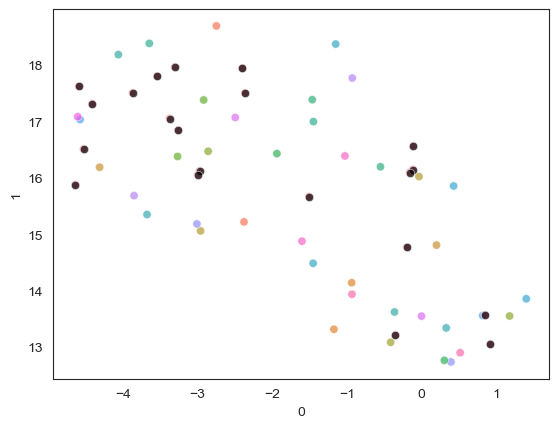

In [255]:
plt.figure()
ax = sns.scatterplot(
        x=0,
        y=1,
        hue="Metadata_cmpd",
        data=merged,
        alpha=(0.7),
        marker="o",
        legend=False
        )
ax = sns.scatterplot(
        x=0,
        y=1,
        color="k",
        data=merged[merged['Metadata_pert_type'] == 'negcon'],
        alpha=(0.7),
        marker="o",
        )



In [ ]:
merged = pd.merge(umapOut, df_toplot[ListOfMetadata], left_index=True, right_index=True)
merged['Metadata_inv_log_conc'] = 10 - pDose(merged['Metadata_cmpd_conc'])

In [257]:
ListOfSelectedFeatures = list(selected_df.columns.values)
ListOfMetadata = list(selected_df.columns[selected_df.columns.str.contains("Metadata_")])
ListOfSelectedFeatures = list(set(ListOfSelectedFeatures) - set(ListOfMetadata))

In [256]:

df_toplot = selected_df
ConcList = sorted(list(set(df_toplot["Metadata_cmpd_conc"])))
ConcList.remove(2.5)

df_toplot['Metadata_cmpd_conc'].loc[(df_toplot['Metadata_cmpd'] == '[dmso]')] = 100

/var/folders/bx/43bwk4n57dj9446w1ddn_7t40000gn/T/ipykernel_21876/1365797312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toplot['Metadata_cmpd_conc'].loc[(df_toplot['Metadata_cmpd'] == '[dmso]')] = 100


In [ ]:
training_data = df_toplot.drop(ListOfMetadata, axis=1).to_numpy()
umap_model = umap.UMAP(n_components=2, n_neighbors=10, min_dist= 0.1, random_state=42)
trained_model = umap_model.fit(training_data)
umapOut = trained_model.transform(training_data)
umapOut = pd.DataFrame(umapOut)

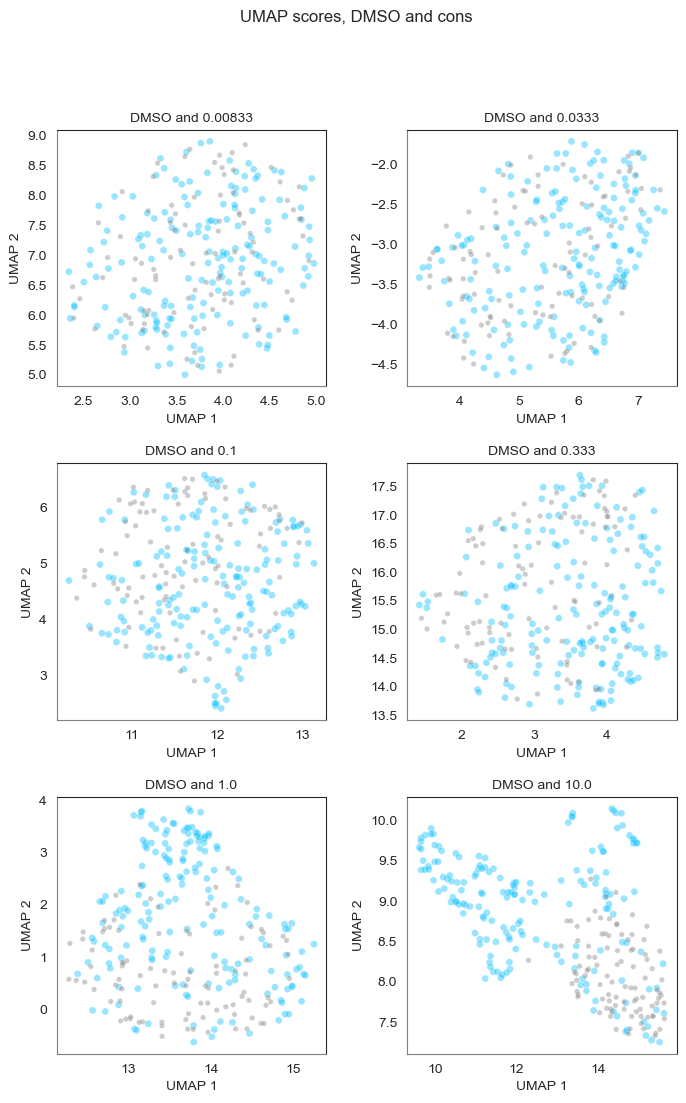

In [277]:
nrrow = 3
nrcol = 2
colors = ["deepskyblue", "gray"]

fig = plt.figure(figsize=(8, 12))
sp = 1
for conc in ConcList:
    dfOneCompound = df_toplot.loc[
        ((df_toplot["Metadata_cmpd_conc"] == conc)), ["Metadata_cmpd", "Metadata_cmpd_conc"] + ListOfSelectedFeatures
    ]
    dfDMSO = df_toplot.loc[
        ((df_toplot["Metadata_cmpd"] == "[dmso]")), ["Metadata_cmpd", "Metadata_cmpd_conc"] + ListOfSelectedFeatures
    ]
    frames = [dfOneCompound, dfDMSO]
    dfOneCompoundandDMSO = pd.concat(frames)
    dfOneCompoundandDMSO.reset_index(inplace=True, drop=True)

    x = dfOneCompoundandDMSO.loc[:, ListOfSelectedFeatures[:]].values
    umap_model = umap.UMAP(n_components=3, random_state=42)
    trained_model = umap_model.fit(x)
    principalComponents = trained_model.transform(x)
    principalDf = pd.DataFrame(data=principalComponents)
    principalDf.rename(
        columns={
            0: "principal component 1",
            1: "principal component 2",
            2: "principal component 3",
        },
        inplace=True,
    )
    principalDf = principalDf.merge(
        dfOneCompoundandDMSO[["Metadata_cmpd", "Metadata_cmpd_conc"]], left_index=True, right_index=True
    )
    # principalDf.to_csv('{}/PCA_dmso_and_{}.csv'.format(OutputDir, comp), sep=';')

    ax = fig.add_subplot(nrrow, nrcol, sp)
    ax.set_xlabel("UMAP 1", fontsize=10)
    ax.set_ylabel("UMAP 2", fontsize=10)
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_color("grey")
    x
    ax = sns.scatterplot(
        x="principal component 1",
        y="principal component 2",
        hue="Metadata_cmpd_conc",
        data=principalDf,
        palette=colors,
        size="Metadata_cmpd_conc",
        sizes=(25, 15),
        alpha=(0.4),
        marker="o",
    )

    ax.set_title("DMSO and {}".format(conc), fontsize=10)
    ax.set_facecolor("w")
    ax.get_legend().remove()
    sp += 1
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle("UMAP scores, DMSO and cons".format(), fontsize=12)
#fig.savefig(
#    "{}/PCA_DMSOandCons.{}".format(OutputDir, figformat), dpi=dpi, bbox_inches="tight"
#)
plt.show()